<a href="https://colab.research.google.com/github/Ajay-user/DataScience/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [764]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Linear Regression 

y = WX+ b

W = Weights 
X = Features
b = bais

## Generate the data

In [765]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10.0, bias=1.0, coef=True,random_state=42)

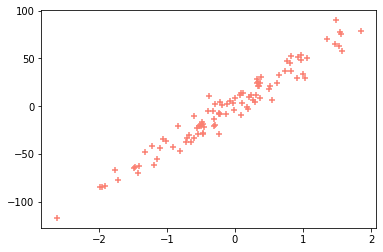

In [766]:
# plot the data
plt.scatter(X, y, marker='+', c='salmon');

In [767]:
pd.DataFrame(data={'feature':X.reshape((100,)), 'target':y, 'weight':coef, 'bias':1.0}).head()

,feature,target,weight,bias
0,0.931280,51.779929,41.7411,1.0
1,0.087047,-9.065270,41.7411,1.0
2,-1.057711,-33.918392,41.7411,1.0
3,0.314247,11.526743,41.7411,1.0
4,-0.479174,-16.738377,41.7411,1.0


In [768]:
## split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

## Weigth matrix  and Bias

In [769]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1

Weights = np.random.rand(INPUT_DIM, OUTPUT_DIM)

Bias = 0.01*np.random.rand(INPUT_DIM, OUTPUT_DIM)

X_train.shape, Weights.shape,Bias.shape

((80, 1), (1, 1), (1, 1))

In [770]:
# output shape after linear operation y = Wx+b
(X_train@Weights+Bias).shape

(80, 1)

## Create a linear model
Linear Model from scratch using python

y = Wx+B

`W = weight`, `x = feature`, `B = bias`

In [771]:
def Linear_model(features, weights=Weights, bias=Bias, output_shape=y_train.shape):
  y_hat = np.matmul(features, weights)+bias
  return y_hat.reshape(output_shape)

In [772]:
# get predictions
y_preds = Linear_model(X_train, Weights, Bias)
y_preds.shape

(80,)

## Loss function
Mean squared error => mean of (y_true - y_preds)**2

In [773]:
def Loss_fn(ground_truth, predictions):
  # return np.mean(np.square(ground_truth-predictions))
  return (1/len(ground_truth))*np.sum((ground_truth - predictions)**2)

In [774]:
# lets compute the loss 
Loss_fn(y_train, y_preds)

1688.3886087648689

## Gradient Descent 
Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.

Loss function => mean squared error

1/N * (y_true - y_pred)**2

y_pred = Wx+b

derivative with respect to Weights = -2/N * (y_true - Wx+b) * x

derivative with respect to bias = -2/N * (y_true - Wx+b) * 1

We want to move in the negative direction of the gradient

### Updating weights and bias

W<sup>k+1</sup> = W<sup>k</sup> - Learning_rate * Gradient

B<sup>k+1</sup> = B<sup>k</sup> - Learning_rate * Gradient





In [775]:
def optimize_model_param(features, ground_truth, predictions, weights=Weights, bias=Bias, learning_rate=1e-3):
  # number of observations
  N = len(ground_truth)

  # compute the gradient
  difference = ground_truth-predictions
  difference = difference.reshape(features.shape)
  dW = -(2/N)*np.sum(difference * features)
  db = -(2/N)*np.sum(difference * 1)

  # update
  W = weights + learning_rate*-dW
  b = bias + learning_rate*-db

  return W,b
  

## Training a Linear model


In [776]:
def model_training(epochs,W,b):
  for i in range(epochs):
    # get predictions
    model_predictions = Linear_model(X_train, weights=W, bias=b)
    # compute loss
    loss = Loss_fn(y_train, model_predictions)
    # print the loss
    print('epoch:',i,' loss:',loss)
    # optimize the model parameters 
    W, b = optimize_model_param(X_train, y_train, model_predictions, weights=W, bias=b)


In [777]:
NUM_EPOCHS = 10
W = Weights
b = Bias


model_training(NUM_EPOCHS,W,b)

epoch: 0  loss: 1688.3886087648689
epoch: 1  loss: 1682.921541929511
epoch: 2  loss: 1677.4734521023552
epoch: 3  loss: 1672.044271576876
epoch: 4  loss: 1666.6339328950178
epoch: 5  loss: 1661.242368846253
epoch: 6  loss: 1655.8695124666517
epoch: 7  loss: 1650.5152970379504
epoch: 8  loss: 1645.1796560866258
epoch: 9  loss: 1639.8625233829728


## Complete Linear model from scratch

In [809]:
class Linear_reg:
  def __init__(self, learning_rate=1e-3):
    self.learning_rate = learning_rate
  
  def set_weight_and_bias(self, INPUT_DIM, OUTPUT_DIM):
    # Weights = np.random.rand(INPUT_DIM, OUTPUT_DIM)
    # Bias = 0.01*np.random.rand(INPUT_DIM, OUTPUT_DIM)
    self.weights, self.bias = Weights.copy(), Bias.copy()
  
  def linear_regression(self, features):
    return np.matmul(features,self.weights)+self.bias

  def loss_fn(self, ground_truth, predictions):
    return np.mean(np.square((ground_truth-predictions)))

  def gradient_descent(self, features, ground_truth, predictions):
    NUM = len(ground_truth)
    difference = ground_truth - predictions
    difference = difference.reshape(features.shape)
    dW = -(2/NUM)*np.sum((difference * features))
    db = -(2/NUM)*np.sum(difference)
    return dW,db
  
  def optimize_model_parametes(self, features, ground_truth, predictions):
    dW, db = self.gradient_descent(features, ground_truth, predictions)
    self.weights += self.learning_rate * -dW
    self.bias += self.learning_rate * -db

  def fit(self, features, ground_truth, epochs=10, to_print=False):
    INPUT_DIM = features.shape[1]
    OUTPUT_DIM = 1
    self.set_weight_and_bias(INPUT_DIM, OUTPUT_DIM)
    
    mse=[]

    for epoch in range(epochs):
      predictions = self.linear_regression(features)
      predictions = predictions.reshape(ground_truth.shape)
      loss = self.loss_fn(ground_truth, predictions)
      self.optimize_model_parametes(features, ground_truth, predictions)
      if to_print:
        print('epoch:',epoch,'loss:',loss)
      mse.append(loss)
    return {'loss':mse}
    
  def predict(self ,test_features):
    y_hat = self.linear_regression(test_features)
    return y_hat
      
  def get_model_coef(self):
    return self.weights, self.bias

    
    
    

In [831]:
reg = Linear_reg(learning_rate=0.01)

history = reg.fit(X_train, y_train, epochs=150)

### Learning curve

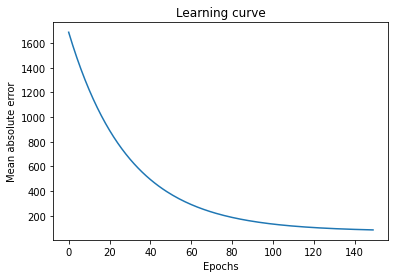

In [832]:
plt.plot(history['loss']);
plt.title('Learning curve')
plt.xlabel('Epochs')
plt.ylabel('Mean absolute error')
plt.show()

In [833]:
# best parameters learned by the model
model_coef = reg.get_model_coef()

In [834]:
model_coef

(array([[40.4450545]]), array([[-0.07751129]]))

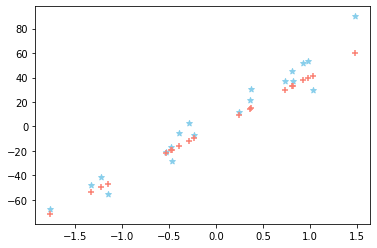

In [839]:
model_predictions = reg.predict(X_test)

plt.scatter(X_test, y_test, marker='*', color='skyblue')
plt.scatter(X_test,model_predictions, marker='+', color='salmon')
plt.show()

In [841]:
# standardize the data
feature_mean, feature_std = X_train.mean(), X_train.std()
label_mean, label_std = y_train.mean(), y_train.std()

scaled_X_train = (X_train-feature_mean)/feature_std
scaled_y_train = (y_train-label_mean)/label_std
scaled_X_test = (X_test-feature_mean)/feature_std
scled_y_test = (y_test-label_mean)/label_std

print('Training data  Mean',scaled_X_train.mean(),'Standard deviation',scaled_X_train.std())
print('Testing data  Mean',scaled_X_test.mean(),'Standard deviation',scaled_X_test.std())

Training data  Mean -5.551115123125783e-18 Standard deviation 1.0
Testing data  Mean 0.13716335543386246 Standard deviation 0.9885161555058851


In [848]:
reg_scaled = Linear_reg(learning_rate=0.01)

history = reg_scaled.fit(X_train_scaled,y_train_scaled, epochs=25)

In [849]:
model_coef = reg_scaled.get_model_coef()
model_coef

(array([[0.44185454]]), array([[0.00513233]]))